In [79]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.model_selection import train_test_split

import sys
sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/MC_studies/Dstlnu_Bt_generic/util_funcs/')
from pandas_colFuncs import isBtoDstlnu, whichBisSig, customMCmatching

In [80]:
#merged_100k_DXtagDstl.root

In [81]:
nfs_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/"

#data_subdir = "Dstlnu_Hc_corr_BsigX_separation_dataRun1/"   
root_subdir = "axheim_Dstlnu_run3/"   
root_path = nfs_path + "createBranchSeparatorData/" + root_subdir
print("data from:",root_path)

data from: /nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/createBranchSeparatorData/axheim_Dstlnu_run3/


In [82]:
take_subset = False

In [83]:
#file = uproot.open("/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/recreateGiannasPlot/merged_100k_DXtagDstl.root:variables")
file = uproot.open(root_path + "merged_DXtagDstl.root:variables")

In [84]:
#file = uproot.open("~/private/MC_studies/Dstlnu_Bt_generic/recreateGiannasPlot/testRun_customMCvars_1/" + "DXtagDstl.root:variables")

In [85]:
#file = uproot.open("/afs/desy.de/user/a/axelheim/private/MC_studies/Dstlnu_Bt_generic/createBranchSeparatorData/axheim_Dstlnu_run3/DXtagDstl.root:variables")

In [86]:
file.keys()

['__experiment__',
 '__run__',
 '__event__',
 '__candidate__',
 '__ncandidates__',
 '__weight__',
 'm2RecoilSignalSide',
 'foxWolframR2_maskedNaN',
 'foxWolframR2',
 'extraInfo__boFEIProbabilityRank__bc',
 'nTracks',
 'BeamE',
 'BeamPx',
 'BeamPy',
 'BeamPz',
 'BeamcmsE',
 'BeamcmsPx',
 'BeamcmsPy',
 'BeamcmsPz',
 'genUp4S_PDG_0',
 'genUp4S_charge_0',
 'genUp4S_mdstIndex_0',
 'genUp4S_genParticleID_0',
 'genUp4S_E_0',
 'genUp4S_Px_0',
 'genUp4S_Py_0',
 'genUp4S_Pz_0',
 'genUp4S_P_0',
 'genUp4S_cmE_0',
 'genUp4S_cmPx_0',
 'genUp4S_cmPy_0',
 'genUp4S_cmPz_0',
 'genUp4S_cmP_0',
 'genUp4S_uniqParID_0',
 'genUp4S_PDG_0_0',
 'genUp4S_mdstIndex_0_0',
 'genUp4S_genParticleID_0_0',
 'genUp4S_uniqParID_0_0',
 'genUp4S_PDG_0_0_0',
 'genUp4S_mdstIndex_0_0_0',
 'genUp4S_genParticleID_0_0_0',
 'genUp4S_uniqParID_0_0_0',
 'genUp4S_PDG_0_0_1',
 'genUp4S_mdstIndex_0_0_1',
 'genUp4S_genParticleID_0_0_1',
 'genUp4S_uniqParID_0_0_1',
 'genUp4S_PDG_0_1',
 'genUp4S_mdstIndex_0_1',
 'genUp4S_genParticleID_0_

In [87]:
df_raw = file.arrays(library="pd")

In [88]:
df_raw.shape[0]

215403

In [89]:
df_raw["__event__"].nunique()

215403

In [90]:
if take_subset:
    df_sample = df_raw.sample(n=86933)
    df=df_sample
else:
    df=df_raw

### create cols for custom MC matching Dstlnu decay and Bsig reco

In [91]:
df

,__experiment__,__run__,__event__,__candidate__,__ncandidates__,__weight__,m2RecoilSignalSide,foxWolframR2_maskedNaN,foxWolframR2,extraInfo__boFEIProbabilityRank__bc,...,Dst_cmpy,Dst_cmpz,Dst_cmpt,Dst_mccmE,Dst_mccmp,Dst_mccmpx,Dst_mccmpy,Dst_mccmpz,Dst_DeltaM,Dst_isSignal
0,1003,0,2457075,0,1,1.0,1.508116,0.094546,0.094546,1.0,...,-0.574009,-0.334726,0.706913,10.583617,0.000957,0.000006,0.0,0.000957,0.154094,0.0
1,1003,0,2457141,0,1,1.0,0.909089,0.063049,0.063049,1.0,...,-0.642422,0.035209,0.643961,10.579945,0.004083,-0.000024,0.0,-0.004083,0.156758,0.0
2,1003,0,2457208,0,1,1.0,0.671384,0.093844,0.093844,1.0,...,0.080304,-0.637311,0.254909,NaN,NaN,NaN,NaN,NaN,0.158321,NaN
3,1003,0,2457240,0,1,1.0,1.931848,0.060164,0.060164,1.0,...,0.604419,-0.008247,1.503847,NaN,NaN,NaN,NaN,NaN,0.156089,NaN
4,1003,0,2457521,0,1,1.0,-2.021414,0.071061,0.071061,1.0,...,1.515792,0.154998,1.637238,NaN,NaN,NaN,NaN,NaN,0.156275,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215398,1003,0,12546657,0,1,1.0,-1.615782,0.066962,0.066962,1.0,...,-1.070650,0.547422,1.185271,10.580068,0.003479,-0.000020,0.0,-0.003479,0.146806,0.0
215399,1003,0,12546699,0,1,1.0,-4.524379,0.040615,0.040615,1.0,...,-0.482730,0.387957,1.065207,NaN,NaN,NaN,NaN,NaN,0.159240,NaN
215400,1003,0,12546758,0,1,1.0,1.811697,0.110509,0.110509,1.0,...,-0.171623,1.464047,1.183151,10.577940,0.001979,0.000011,0.0,0.001979,0.146530,0.0
215401,1003,0,12546770,0,1,1.0,2.430929,0.095538,0.095538,1.0,...,-0.015023,0.281894,0.365037,NaN,NaN,NaN,NaN,NaN,0.159356,NaN


In [92]:
df[df["dau1_isSignal"]==1]['D_dau4_motherPDG'].unique()

array([  nan,  421.,  223.,  221., -421.])

In [93]:
np.set_printoptions(suppress=True)
print(df[df["dau1_isSignal"]==1]['dau1_mcPDG'].unique())
print(df[df["dau1_isSignal"]==1]['dau1_dau1_mcPDG'].unique())
print(df[df["dau1_isSignal"]==1]['dau1_dau0_mcPDG'].unique())
print(df[df["dau1_isSignal"]==1]['D_dau4_motherPDG'].unique())

[ 511. -511.]
[-13.  13. -11.  11.]
[-413.  413.]
[  nan  421.  223.  221. -421.]


In [94]:
varname = 'genUp4S_PDG_1_0_0'
print(df[df["dau1_isSignal"]==1][varname].unique())

[    333.     421.    2212.    -421.    -211.     211.     321.     443.
     313.     310.    -411.     411.    -313.      14.    -321.     311.
     431.     323.      22.      11.    4122.     111.     221.     423.
   20213.     223.    -423.    -311.    -413.     130.    -433.    -431.
      nan    -213.     213.  -20313.     433.     -14.   -2114.    2112.
    -323.  -20213.     113.     331.    3312. 9000221.     -13.   -4132.
    4132.   20313.     225.   -4122.  -10323.     413.   -2212.     -11.
   -4232.    3222.]


In [95]:
df['isBtoDstlnu'] = df.apply(isBtoDstlnu, axis=1)
df['Bsig_uniqParID'] = df.apply(whichBisSig, axis=1)

In [96]:
df['Bsig_uniqParID'].unique()

array([       0., 83886082., 83886081.])

In [97]:
df.shape[0]

215403

In [98]:
df[df['isBtoDstlnu']==1].shape[0]

88394

In [99]:
df['customMCmatching'] = df.apply(customMCmatching, axis=1)

In [100]:
df[df["isBtoDstlnu"]==1].shape[0]

88394

In [101]:
df[df["customMCmatching"]==1].shape[0]

4294

In [102]:
df.shape[0]

215403

In [103]:
df[df["dau1_isSignal"]==1].shape[0]

4712

In [104]:
df[(df["dau1_isSignal"]==1) & (df["customMCmatching"]!=1)].shape[0]

1068

In [105]:
#mask = (df['value2'] == 'A') & (df['value'] > 4)
mask = (df['dau1_mcPDG'].abs() == 511.0)

masked_df = df[mask]
print("masked_df:",masked_df.shape[0])
print("dau1_isSignal&isBtoDstlnu:",masked_df[(masked_df["dau1_isSignal"]==1) & (masked_df["isBtoDstlnu"]==1)].shape[0])
print("customMCmatching:",masked_df[(masked_df["customMCmatching"]==1)].shape[0])
print("isBtoDstlnu:",masked_df[(masked_df["isBtoDstlnu"]==1)].shape[0])
print("dau1_isSignal:",masked_df[(masked_df["dau1_isSignal"]==1)].shape[0])

masked_df: 7416
dau1_isSignal&isBtoDstlnu: 4699
customMCmatching: 3814
isBtoDstlnu: 5834
dau1_isSignal: 4712


In [106]:
print("df:",df.shape[0])
print("dau1_isSignal&isBtoDstlnu:",df[(df["dau1_isSignal"]==1) & (df["isBtoDstlnu"]==1)].shape[0])
print("customMCmatching:",df[(df["customMCmatching"]==1)].shape[0])
print("isBtoDstlnu:",df[(df["isBtoDstlnu"]==1)].shape[0])
print("dau1_isSignal:",df[(df["dau1_isSignal"]==1)].shape[0])

df: 215403
dau1_isSignal&isBtoDstlnu: 4699
customMCmatching: 4294
isBtoDstlnu: 88394
dau1_isSignal: 4712


In [107]:
df['dau1_mcPDG'].value_counts()

 300553.0    125343
-511.0         3710
 511.0         3706
 100443.0         1
 100441.0         1
Name: dau1_mcPDG, dtype: int64

In [108]:
df[(df["dau1_isSignal"]==1) & (df["isBtoDstlnu"]==1)].shape[0]

4699

In [109]:
df[(df["dau1_isSignal"]==1) & (df["customMCmatching"]==1)][['dau1_mcPDG','dau1_dau0_mcPDG','dau1_dau1_mcPDG','D_dau0_genGmothID', 'D_dau0_motherPDG', 'D_dau0_gmotherPDG', 'D_dau0_mcPDG', 'D_dau1_genGmothID', 'D_dau1_motherPDG', 'D_dau1_gmotherPDG', 'D_dau1_mcPDG', 'D_dau2_genGmothID', 'D_dau2_motherPDG', 'D_dau2_gmotherPDG', 'D_dau2_mcPDG', 'D_dau3_genGmothID', 'D_dau3_motherPDG', 'D_dau3_gmotherPDG', 'D_dau3_mcPDG', 'D_dau4_genGmothID', 'D_dau4_motherPDG', 'D_dau4_gmotherPDG', 'D_dau4_mcPDG']][:15]

,dau1_mcPDG,dau1_dau0_mcPDG,dau1_dau1_mcPDG,D_dau0_genGmothID,D_dau0_motherPDG,D_dau0_gmotherPDG,D_dau0_mcPDG,D_dau1_genGmothID,D_dau1_motherPDG,D_dau1_gmotherPDG,...,D_dau2_gmotherPDG,D_dau2_mcPDG,D_dau3_genGmothID,D_dau3_motherPDG,D_dau3_gmotherPDG,D_dau3_mcPDG,D_dau4_genGmothID,D_dau4_motherPDG,D_dau4_gmotherPDG,D_dau4_mcPDG
51,511.0,-413.0,-13.0,3.0,-421.0,-413.0,321.0,3.0,-421.0,-413.0,...,-413.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,-511.0,413.0,13.0,5.0,421.0,413.0,-321.0,5.0,421.0,413.0,...,413.0,-211.0,5.0,421.0,413.0,211.0,NaN,NaN,NaN,NaN
131,-511.0,413.0,13.0,7.0,421.0,413.0,-321.0,7.0,421.0,413.0,...,413.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,511.0,-413.0,-11.0,3.0,-421.0,-413.0,321.0,3.0,-421.0,-413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,511.0,-413.0,-11.0,5.0,-421.0,-413.0,321.0,5.0,-421.0,-413.0,...,-413.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
383,511.0,-413.0,-11.0,3.0,-421.0,-413.0,321.0,3.0,-421.0,-413.0,...,-413.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,511.0,-413.0,-13.0,3.0,-421.0,-413.0,321.0,3.0,-421.0,-413.0,...,-413.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,-511.0,413.0,11.0,3.0,421.0,413.0,-321.0,3.0,421.0,413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,511.0,-413.0,-13.0,5.0,-421.0,-413.0,321.0,5.0,-421.0,-413.0,...,-413.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,-511.0,413.0,13.0,3.0,421.0,413.0,-321.0,3.0,421.0,413.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df[df["dau1_isSignal"]==1][['D_dau0_motherPDG', 'D_dau0_gmotherPDG', 'D_dau1_motherPDG', 'D_dau1_gmotherPDG', 'D_dau2_motherPDG', 'D_dau2_gmotherPDG',  'D_dau3_motherPDG', 'D_dau3_gmotherPDG',  'D_dau4_motherPDG', 'D_dau4_gmotherPDG', 'D_dau4_mcPDG']][:15]

,D_dau0_motherPDG,D_dau0_gmotherPDG,D_dau1_motherPDG,D_dau1_gmotherPDG,D_dau2_motherPDG,D_dau2_gmotherPDG,D_dau3_motherPDG,D_dau3_gmotherPDG,D_dau4_motherPDG,D_dau4_gmotherPDG,D_dau4_mcPDG
51,-421.0,-413.0,-421.0,-413.0,-421.0,-413.0,NaN,NaN,NaN,NaN,NaN
60,421.0,413.0,421.0,413.0,421.0,413.0,421.0,413.0,NaN,NaN,NaN
131,421.0,413.0,421.0,413.0,421.0,413.0,NaN,NaN,NaN,NaN,NaN
281,-421.0,-413.0,-421.0,-413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
357,-421.0,-413.0,-421.0,-413.0,-421.0,-413.0,NaN,NaN,NaN,NaN,NaN
383,-421.0,-413.0,-421.0,-413.0,-421.0,-413.0,NaN,NaN,NaN,NaN,NaN
417,-421.0,-413.0,-421.0,-413.0,-421.0,-413.0,NaN,NaN,NaN,NaN,NaN
421,421.0,413.0,421.0,413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,-421.0,-413.0,-421.0,-413.0,-421.0,-413.0,NaN,NaN,NaN,NaN,NaN
472,421.0,413.0,421.0,413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
df[['D_dau0_motherPDG', 'D_dau0_gmotherPDG', 'D_dau1_motherPDG', 'D_dau1_gmotherPDG', 'D_dau2_motherPDG', 'D_dau2_gmotherPDG',  'D_dau3_motherPDG', 'D_dau3_gmotherPDG',  'D_dau4_motherPDG', 'D_dau4_gmotherPDG', 'D_dau4_mcPDG']][:15]

,D_dau0_motherPDG,D_dau0_gmotherPDG,D_dau1_motherPDG,D_dau1_gmotherPDG,D_dau2_motherPDG,D_dau2_gmotherPDG,D_dau3_motherPDG,D_dau3_gmotherPDG,D_dau4_motherPDG,D_dau4_gmotherPDG,D_dau4_mcPDG
0,-411.0,511.0,213.0,511.0,113.0,511.0,113.0,511.0,NaN,NaN,NaN
1,213.0,511.0,223.0,511.0,323.0,-421.0,-213.0,-421.0,NaN,NaN,NaN
2,-213.0,511.0,211.0,310.0,-421.0,511.0,113.0,511.0,0.0,0.0,NaN
3,-213.0,-421.0,-313.0,411.0,511.0,300553.0,223.0,-511.0,0.0,0.0,NaN
4,323.0,411.0,-511.0,300553.0,0.0,0.0,-421.0,-413.0,NaN,NaN,NaN
5,511.0,300553.0,-511.0,300553.0,223.0,-511.0,-511.0,300553.0,0.0,0.0,NaN
6,-511.0,300553.0,-511.0,300553.0,-4122.0,-4222.0,NaN,NaN,NaN,NaN,NaN
7,511.0,300553.0,213.0,-511.0,223.0,511.0,223.0,511.0,300553.0,0.0,-511.0
8,-421.0,511.0,-411.0,511.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,421.0,413.0,310.0,421.0,-313.0,511.0,421.0,413.0,NaN,NaN,NaN


In [111]:
df[df["dau1_isSignal"]==1][[ 'D_dau0_mcPDG', 'D_dau1_mcPDG',  'D_dau2_mcPDG',  'D_dau3_mcPDG',  'D_dau4_mcPDG']][:15]

,D_dau0_mcPDG,D_dau1_mcPDG,D_dau2_mcPDG,D_dau3_mcPDG,D_dau4_mcPDG
51,321.0,-211.0,111.0,NaN,NaN
60,-321.0,211.0,-211.0,211.0,NaN
131,-321.0,211.0,111.0,NaN,NaN
281,321.0,-211.0,NaN,NaN,NaN
357,321.0,-211.0,111.0,NaN,NaN
383,321.0,-211.0,111.0,NaN,NaN
417,321.0,-211.0,111.0,NaN,NaN
421,-321.0,211.0,NaN,NaN,NaN
443,321.0,-211.0,111.0,NaN,NaN
472,-321.0,211.0,NaN,NaN,NaN


In [24]:
df["genUp4S_mdstIndex_1_0"].value_counts()

6.0     78450
7.0     44767
8.0     30356
5.0     29424
9.0     17591
10.0     8779
11.0     3973
12.0     1552
13.0      506
14.0        4
15.0        1
Name: genUp4S_mdstIndex_1_0, dtype: int64

In [25]:
df["abs_D_dau1_gmotherPDG"] = (df["D_dau1_gmotherPDG"]).abs()

## test if genMotherPDG and mcMother(mcPDG) are equal

In [65]:
for i in range(5):
    print(i)
    print(df[f'D_dau{i}_motherPDG'].equals(df[f'D_dau{i}_mcMotherPDG_']))
    print(df[f'D_dau{i}_gmotherPDG'].equals(df[f'D_dau{i}_mcGMotherPDG_']))    

0
True
True
1
True
True
2
False
False
3
False
False
4
False
False


In [72]:
df['D_dau4_gmotherPDG'] != df['D_dau4_mcGMotherPDG_']

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18    False
dtype: bool

In [78]:
#df[['D_dau0_motherPDG', 'D_dau0_gmotherPDG', 'D_dau1_motherPDG', 'D_dau1_gmotherPDG', 'D_dau2_motherPDG', 'D_dau2_gmotherPDG',  'D_dau3_motherPDG', 'D_dau3_gmotherPDG',  'D_dau4_motherPDG', 'D_dau4_gmotherPDG', 'D_dau4_mcPDG']][:15]
k=3
df[df[f'D_dau{k}_gmotherPDG'] != df[f'D_dau{k}_mcGMotherPDG_']][[f'D_dau{k}_motherPDG', f'D_dau{k}_mcMotherPDG_', f'D_dau{k}_gmotherPDG', f'D_dau{k}_mcGMotherPDG_']][:15]

#[df["dau1_isSignal"]==1]

,D_dau3_motherPDG,D_dau3_mcMotherPDG_,D_dau3_gmotherPDG,D_dau3_mcGMotherPDG_
3,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN
17,0.0,NaN,0.0,NaN


In [26]:
combis = pd.DataFrame({'count' : df.groupby( ["abs_D_dau1_gmotherPDG","D_dau1_genGmothID"] ).size()}).reset_index()
combis.sort_values("count", ascending=False)[:20]

,abs_D_dau1_gmotherPDG,D_dau1_genGmothID,count
1077,511.0,2.0,30499
1076,511.0,1.0,30345
1700,300553.0,0.0,26515
800,413.0,3.0,22256
803,413.0,6.0,7284
804,413.0,7.0,5374
805,413.0,8.0,4312
802,413.0,5.0,4052
806,413.0,9.0,2608
855,421.0,12.0,2534


### this step is necessary because the uproot works only with my conda environment but on my localhost jupyterhub server the plots make the kernel die

In [ ]:
df.to_csv(root_path + "GiannasPlot_DXtagDstl_df.csv")

In [3]:
df = pd.read_csv(root_path + "GiannasPlot_DXtagDstl_df.csv")

## print combinations of decay particles (mcDaughter(PDG))

In [28]:
#combis = pd.DataFrame({'count' : df.groupby( ["__event__","genUp4S_PDG_1_2","genUp4S_PDG_0_2"] ).size()}).reset_index()
combis = pd.DataFrame({'count' : df.groupby( ["genUp4S_PDG_1_2","genUp4S_PDG_0_2"] ).size()}).reset_index()



with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(combis.sort_values("count"))



   genUp4S_PDG_1_2  genUp4S_PDG_0_2  count
0           -321.0            113.0      1
1           -211.0            211.0      1
2            -12.0            211.0      1
3             11.0            223.0      1
4             14.0          -2114.0      1


In [29]:
#combis = pd.DataFrame({'count' : df.groupby( ["__event__","genUp4S_PDG_1_2","genUp4S_PDG_0_2"] ).size()}).reset_index()
Bmesons = pd.DataFrame({'count' : df.groupby( ["genUp4S_PDG_1","genUp4S_PDG_0","dau1_mdstIndex"] ).size()}).reset_index()



with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(Bmesons.sort_values("count"))



   genUp4S_PDG_1  genUp4S_PDG_0  dau1_mdstIndex  count
1          511.0         -511.0             0.0      2
0         -511.0          511.0             0.0      3


In [30]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df["dau1_dau1_mothermdstIndex"].value_counts())


2.0    4
1.0    1
Name: dau1_dau1_mothermdstIndex, dtype: int64


## plots

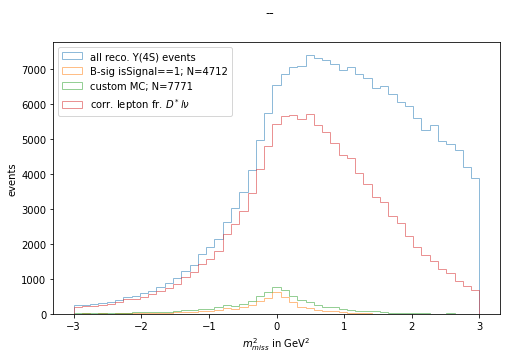

In [7]:
bins = np.linspace(-3, 3, 50)
fig, ax = plt.subplots()
fig.suptitle('--')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'$m_{miss}^2$ in GeV$^2$')
ax.set_ylabel("events")




ax.hist(df.m2RecoilSignalSide, bins, alpha=0.5, label='all reco. Y(4S) events',histtype='step')

num_corrEvts = df[(df["dau1_isSignal"] == 1)].shape[0]
ax.hist(df[(df["dau1_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('B-sig isSignal==1; N=%i' %num_corrEvts),histtype='step')
#ax.hist(df[(df["Dst_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('D* isSignal==1; N=%i' %num_corrEvts),histtype='step')

num_corrEvts_custMC = df[(df["customMCmatching"] == 1)].shape[0]
ax.hist(df[(df["customMCmatching"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('custom MC; N=%i' %num_corrEvts_custMC),histtype='step')


correct_lep = df[(df["lep_motherPDG"].abs() == 511) & ((df["lep_mcPDG"].abs() == 13) | (df["lep_mcPDG"].abs() == 11))]
ax.hist(correct_lep.m2RecoilSignalSide, bins, alpha=0.5, label=(r'corr. lepton fr. $D^*l\nu$'),histtype='step')



ax.legend(loc='upper left')


plt.savefig('mmSquared_isSignal_GiannasScript_beforeOfflineCuts.pdf')

In [5]:
cut_df = df
print(cut_df.shape[0])
cut_df = cut_df[cut_df.dau0_Mbc > 5.26] # cut on B_tag M_bc
print(cut_df.shape[0])
cut_df = cut_df[(cut_df.dau0_deltaE < 0.2) & (cut_df.dau0_deltaE > -0.2)] # cut on B_tag deltaE
print(cut_df.shape[0])
cut_df = cut_df[cut_df.dau0_dau0_sigProb > 0.001] # cut on H_c sigProb
print(cut_df.shape[0])
cut_df = cut_df[cut_df.foxWolframR2 < 0.3] # cut on event
print(cut_df.shape[0])
cut_df = cut_df[(cut_df.Dst_pt < 2.4) & (cut_df.lep_pt > 1.0)] # cut on l and D* pt

215403
25342
25342
25342
24079


In [ ]:
print("% of isSignal Hc after offline cuts:",round(cut_df[cut_df["dau0_dau0_isSignalAcceptMissingGamma"] == 1].shape[0] / cut_df.shape[0] * 100 ,2))
print("% of isSignal Hc before offline cuts:",round(df[df["dau0_dau0_isSignalAcceptMissingGamma"] == 1].shape[0] / df.shape[0] * 100 ,2))


In [ ]:
print("precut correctly reconstr. D* events",df[(df["Dst_isSignal"] == 1)].shape[0])

In [ ]:
print("after cut correctly reconstr. D* events",cut_df[(cut_df["Dst_isSignal"] == 1)].shape[0])

In [ ]:
hist = df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4), by="dau1_isSignal") # dau1 = B-sig; dau1_isSignal = acceptMissingNeutrino

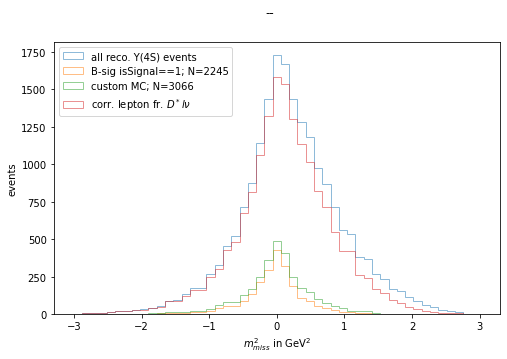

In [8]:
bins = np.linspace(-3, 3, 50)
fig, ax = plt.subplots()
fig.suptitle('--')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'$m_{miss}^2$ in GeV$^2$')
ax.set_ylabel("events")

num_corrEvts = cut_df[(cut_df["Dst_isSignal"] == 1)].shape[0]

ax.hist(cut_df.m2RecoilSignalSide, bins, alpha=0.5, label='all reco. Y(4S) events',histtype='step')


num_corrEvts = cut_df[(cut_df["dau1_isSignal"] == 1)].shape[0]
ax.hist(cut_df[(cut_df["dau1_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('B-sig isSignal==1; N=%i' %num_corrEvts),histtype='step')
#ax.hist(df[(df["Dst_isSignal"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('D* isSignal==1; N=%i' %num_corrEvts),histtype='step')

num_corrEvts_custMC = cut_df[(cut_df["customMCmatching"] == 1)].shape[0]
ax.hist(cut_df[(cut_df["customMCmatching"] == 1)].m2RecoilSignalSide, bins, alpha=0.5, label=('custom MC; N=%i' %num_corrEvts_custMC),histtype='step')


correct_lep = cut_df[(cut_df["lep_motherPDG"].abs() == 511) & ((cut_df["lep_mcPDG"].abs() == 13) | (cut_df["lep_mcPDG"].abs() == 11))]
ax.hist(correct_lep.m2RecoilSignalSide, bins, alpha=0.5,label=(r'corr. lepton fr. $D^*l\nu$'),histtype='step')

#correct_Dst = cut_df[(cut_df["dau1_dau0_mcPDG"].abs() == 511) & ((cut_df["lep_mcPDG"].abs() == 13) | (cut_df["lep_mcPDG"].abs() == 11))]
#ax.hist(correct_lep.m2RecoilSignalSide, bins, alpha=0.5, label="correct lepton",histtype='step')



#lep_motherPDG
ax.legend(loc='upper left')

plt.savefig('mmSquared_isSignal_GiannasScript_afterOfflineCuts.pdf')

In [ ]:
cut_df["genUp4S_PDG_1_2"].abs().value_counts()

In [ ]:
cut_df["dau1_mcPDG"].abs().value_counts()

In [ ]:
cut_df["lep_motherPDG"].abs().value_counts()

In [ ]:
cut_df[(cut_df["lep_motherPDG"].abs() == 511) & ((cut_df["lep_mcPDG"].abs() == 13) | (cut_df["lep_mcPDG"].abs() == 11))]

In [ ]:
cut_df["lep_motherPDG"].value_counts() 

In [ ]:
cut_df["lep_mcPDG"].value_counts() 

In [ ]:
for key in cut_df.keys():
    print(key)

In [ ]:
print("rows:",cut_df.shape[0])
print("colums:",cut_df.shape[1])



In [ ]:
hist = cut_df.hist("m2RecoilSignalSide", bins=100, figsize=(8,8))

title="offline cut m2RecoilSignalSide"
xlim = (-2,2)

xlabel="missing mass squared/GeV^2"
ylabel="events"

plt.setp(hist, xlim=xlim, xlabel=xlabel, ylabel=ylabel, title=title)


#plt.savefig('GiannasPlotRecreated_MC14ri_a.pdf')

In [ ]:
hist = cut_df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4), by="dau1_isSignal") # dau1 = B-sig; dau1_isSignal = acceptMissingNeutrino

In [ ]:
hist = cut_df.hist("m2RecoilSignalSide", bins=100, figsize=(12,4), by="dau0_dau0_isSignal")


In [ ]:
cut_df